# Classifying Stocks Using Machine Learning
## Classifying Stock Direction
<hr>

The purpose of this notebook is to test machine learning techniques on our current dataset. 

### Objectives
 - Remove columns not necessary to ML
 - develop pipeline to normalize numeric data
 - run multiple classifications
 - review accuracy of predictions
 - review the weights of classifiers

In [1]:
import math
import os
import requests
from datetime import datetime, timedelta
import time
import warnings
import pandas as pd
import numpy as np
from collections import Counter 

In [2]:
df = pd.read_hdf('stocksCleaned.h5')

In [3]:
df.head()

ticker        date                                           headline  \
0     FB  2016-08-09  [Onetime Home of Warner Bros.’ Harry Warner As...   
1     FB  2021-03-15  [Rupert Murdoch's News Corp strikes deal as Fa...   
2     FB  2021-03-16  [NetApp reformula a organização de vendas glob...   
3     FB  2021-03-17  [Facebook Promises More Support For Human Righ...   
4     FB  2021-03-18  [Take A Sneak Peek At The Weirdly-Shaped New P...   

   news_sentiment_score                                             source  \
0                  3.00                                         [DowJones]   
1                  2.00  [The Guardian, https://nypost.com, https://www...   
2                  1.91  [businesswire, benzinga, businesswire, busines...   
3                  1.89  [https://www.forbes.com, businesswire, busines...   
4                  1.85  [benzinga, benzinga, benzinga, businesswire, b...   

                                                 url  amount_of_articles  \
0  [https://finnhub.io/api/news?id=7dbe5db9757dda...                   1   
1  [https://finnhub.io/api/news?id=61c0d589cb8bf9...                  70   
2  [https://finnhub.io/api/news?id=6479351ac59fa2...                  89   
3  [https://finnhub.io/api/news?id=ad0559e9f8ae60...                  58   
4  [https://finnhub.io/api/news?id=e851ef47ee28e6...                  77   

      open   close    volume  social_sentiments  mentions  news_sentiment  \
0  125.340  125.06  19620967          -0.199921         0           0.500   
1  269.080  273.75  16856746           0.066288        45           0.000   
2  276.085  279.28  22437665          -0.339269        85          -0.045   
3  275.705  284.01  21315044          -0.589213       135          -0.055   
4  279.870  278.62  18754853          -0.361794       534          -0.075   

   close_better  tomorrow_better  
0             0                1  
1             1                1  
2             1                1  
3             1                0  
4             0                1

In [4]:
df.columns

Index(['ticker', 'date', 'headline', 'news_sentiment_score', 'source', 'url',
       'amount_of_articles', 'open', 'close', 'volume', 'social_sentiments',
       'mentions', 'news_sentiment', 'close_better', 'tomorrow_better'],
      dtype='object')

In [5]:
cols = ['ticker','news_sentiment', 'amount_of_articles', 
        'open', 'close', 'volume', 'social_sentiments',
       'mentions', 'close_better', 'tomorrow_better']

In [6]:
df = df[cols]

In [7]:
df['ticker'].unique()

array(['FB', 'ORCL', 'PYPL', 'UBER'], dtype=object)

In [8]:
df = df[df.ticker == 'UBER']

In [9]:
# close_better label is very balanced
a = len(df[df['close_better'] == 0])
b = len(df[df['close_better'] == 1])
print(a)
print(b)
c=b+a
print(a/c)
print(b/c)

57
42
0.5757575757575758
0.42424242424242425


In [10]:
# tomorrow_better label is balanced
a = len(df[df['tomorrow_better'] == 0])
b = len(df[df['tomorrow_better'] == 1])
print(a)
print(b)
c=b+a
print(a/c)
print(b/c)

53
46
0.5353535353535354
0.46464646464646464


In [11]:
cols = ['news_sentiment', 'amount_of_articles', 
        'open', 'close', 'volume', 'social_sentiments',
       'mentions']
target_A = ['close_better']
target_B = ['tomorrow_better']

In [12]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# apply SMOTE oversampling
X = df[cols]
y = df[target_B]

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

In [13]:
ones=0
zeros=0
for i in y_resampled['tomorrow_better']:
    if i ==0:
        zeros=zeros+1
    if i ==1:
        ones=ones+1
        
print(ones)
print(zeros)

53
53


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, cols)])

In [212]:
# this one uses smote

from sklearn.model_selection import train_test_split

X_resampled['tomorrow_better'] = y_resampled
X_resampled

X_train, X_test = train_test_split(X_resampled, test_size=0.2, random_state=42, stratify = X_resampled["tomorrow_better"])

In [15]:
# no oversampling

from sklearn.model_selection import train_test_split

X_noresampled = X
X_noresampled['tomorrow_better'] = y

X_train, X_test = train_test_split(X_noresampled, test_size=0.2, random_state=2, stratify = X_noresampled["tomorrow_better"])

<ipython-input-15-3b2240b8d8c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_noresampled['tomorrow_better'] = y


In [22]:
y_train = X_train["tomorrow_better"]
y_test = X_test["tomorrow_better"]

del X_train["tomorrow_better"]
del X_test["tomorrow_better"]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from statistics import mean

l_reg = []
l_neigh = []
l_tree = []
l_svm = []
l_forest = []

for i in range(50):
    reg = LogisticRegression().fit(X_train, y_train)
    l_reg.append(reg.score(X_test, y_test))

    neigh = KNeighborsClassifier()
    neigh.fit(X_train, y_train)
    l_neigh.append(neigh.score(X_test, y_test))


    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    l_tree.append(tree.score(X_test, y_test))


    svm = SVC()
    svm.fit(X_train, y_train)
    l_svm.append(svm.score(X_test, y_test))

    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    l_forest.append(forest.score(X_test, y_test))


    
print("regression:",mean(l_reg))
print("KNN:",mean(l_neigh))
print("decision trees:",mean(l_tree))
print("SVM:",mean(l_svm))
print("rand forest:",mean(l_forest))

# bar chart 

# lineplot of acc increasing through grid search



regression: 0.55
KNN: 0.65
decision trees: 0.541
SVM: 0.55
rand forest: 0.599


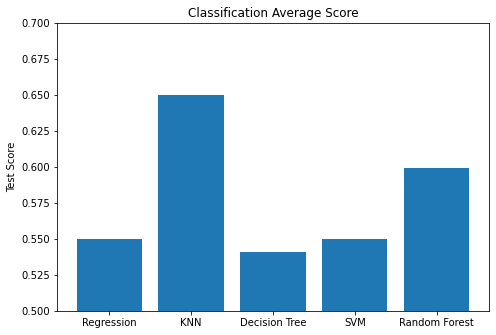

In [38]:
import matplotlib.pyplot as plt

labels = ["Regression","KNN","Decision Tree","SVM","Random Forest"]
points =  [mean(l_reg),mean(l_neigh),mean(l_tree),mean(l_svm),mean(l_forest)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(.5,.7)
plt.ylabel("Test Score")
plt.title("Classification Average Score")

ax.bar(labels,points)
plt.show()

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20



0.6313131313131313

In [68]:
%%time
grid_params = { 'n_neighbors' : list(range(1,30)),
               'leaf_size' : list(range(1,50)),
               'p' : [1,2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, grid_params, cv=5,verbose=2)

best_model_knn = clf.fit(X_resampled,list(y_resampled['tomorrow_better'].values))

Fitting 5 folds for each of 17052 candidates, totalling 85260 fits
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weigh

[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkow

[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclid

[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhat

[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhat

[CV] END leaf_size=1, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, met

[CV] END leaf_size=2, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkow

[CV] END leaf_size=2, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkow

[CV] END leaf_size=2, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclid

[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=eucl

[CV] END leaf_size=2, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhat

[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=2, met

[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkow

[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkow

[CV] END leaf_size=3, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclid

[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclid

[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhat

[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=man

[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=3, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=3, met

[CV] END leaf_size=4, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkow

[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclid

[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhat

[CV] END leaf_size=4, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhat

[CV] END leaf_size=4, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=4, met

[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkow

[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkow

[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclid

[CV] END leaf_size=5, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhat

[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=5, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=5, met

[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkow

[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkow

[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=minkowski, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclid

[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclid

[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhat

[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhat

[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=6, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=6, met

[CV] END leaf_size=7, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkow

[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkow

[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclid

[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhat

[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, met

[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=7, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkow

[CV] END leaf_size=8, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclid

[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclid

[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=manhattan, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhat

[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhat

[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=8, met

[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkow

[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclid

[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhat

[CV] END leaf_size=9, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhat

[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=9, met

[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, me

[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, me

[CV] END leaf_size=10, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, me

[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, me

[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, me

[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=10, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, me

[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, me

[CV] END leaf_size=11, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, me

[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, me

[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=11, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=11, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, me

[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, me

[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, me

[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, me

[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=12, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, me

[CV] END leaf_size=13, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, me

[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=minkowski, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, me

[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, me

[CV] END leaf_size=13, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=euclidean, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, me

[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, me

[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=13, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, me

[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, me

[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, me

[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=14, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, me

[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, me

[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, me

[CV] END leaf_size=15, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, me

[CV] END leaf_size=15, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, me

[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=15, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, me

[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, me

[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, me

[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, 

[CV] END leaf_size=16, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, me

[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=16, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, me

[CV] END leaf_size=17, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=minkowski, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, me

[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, me

[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, me

[CV] END leaf_size=17, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=

[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=17, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=17, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, me

[CV] END leaf_size=18, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, me

[CV] END leaf_size=18, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, me

[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, me

[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=18, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=18, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, me

[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, me

[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=euclidean, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, me

[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, me

[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=19, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, me

[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, me

[CV] END leaf_size=20, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, me

[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, me

[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=20, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21

[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, me

[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, me

[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, me

[CV] END leaf_size=21, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, me

[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, me

[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=21, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, me

[CV] END leaf_size=22, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, me

[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, me

[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22,

[CV] END leaf_size=22, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, me

[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=22, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, me

[CV] END leaf_size=23, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=minkowski, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, me

[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, me

[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, me

[CV] END leaf_size=23, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size

[CV] END leaf_size=23, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=23, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, me

[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, me

[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, me

[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, me

[CV] END leaf_size=24, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=24, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, me

[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, me

[CV] END leaf_size=25, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, me

[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, me

[CV] END leaf_size=25, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, me

[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=25, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=25, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, me

[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, me

[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, me

[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, me

[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, me

[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=26, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, me

[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, me

[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, me

[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, me

[CV] END leaf_size=27, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=27, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, me

[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, 

[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, me

[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28,

[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, me

[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=28, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_si

[CV] END leaf_size=29, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, me

[CV] END leaf_size=29, metric=minkowski, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, me

[CV] END leaf_size=29, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, me

[CV] END leaf_size=29, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, me

[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, me

[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=29, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=29, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, me

[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, me

[CV] END leaf_size=30, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, me

[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, me

[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, me

[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, me

[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, me

[CV] END leaf_size=31, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, me

[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, me

[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=euclidean, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, me

[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, me

[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=31, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, me

[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, me

[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, me

[CV] END leaf_size=32, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, me

[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, me

[CV] END leaf_size=32, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, me

[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=32, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, me

[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, me

[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, me

[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, me

[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=33, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=33, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, me

[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, me

[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, me

[CV] END leaf_size=34, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, me

[CV] END leaf_size=34, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=34, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, me

[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, me

[CV] END leaf_size=35, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, me

[CV] END leaf_size=35, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35

[CV] END leaf_size=35, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=35, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, me

[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, me

[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, me

[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, me

[CV] END leaf_size=36, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=36, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, me

[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, me

[CV] END leaf_size=37, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, me

[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, me

[CV] END leaf_size=37, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37

[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=37, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, me

[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, me

[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=minkowski, n_neighbors=28, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, me

[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, me

[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38

[CV] END leaf_size=38, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, me

[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=38, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=38, metric=manhattan, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=

[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, me

[CV] END leaf_size=39, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_siz

[CV] END leaf_size=39, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=minkowski, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=minkowski, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, 

[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, me

[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size

[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, me

[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=39, metric=manhattan, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, me

[CV] END leaf_size=40, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=4

[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, me

[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, me

[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, me

[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, me

[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=40, metric=manhattan, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, me

[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, m

[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, me

[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, me

[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, me

[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, me

[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=41, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, me

[CV] END leaf_size=42, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, me

[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=minkowski, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, me

[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, me

[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=euclidean, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, me

[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, me

[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=42, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, me

[CV] END leaf_size=43, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, me

[CV] END leaf_size=43, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, me

[CV] END leaf_size=43, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, me

[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, m

[CV] END leaf_size=43, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, me

[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=43, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, me

[CV] END leaf_size=44, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, me

[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, me

[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, me

[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, me

[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, me

[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=23, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=44, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=44, metric=manhattan, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, me

[CV] END leaf_size=45, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, me

[CV] END leaf_size=45, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=minkowski, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, me

[CV] END leaf_size=45, metric=euclidean, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, me

[CV] END leaf_size=45, metric=euclidean, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=euclidean, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, me

[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=manhattan, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=45, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=45, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, me

[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, me

[CV] END leaf_size=46, metric=minkowski, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=minkowski, n_neighbors=28, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=28, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, me

[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, me

[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=euclidean, n_neighbors=29, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, me

[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=21, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=46, metric=manhattan, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, me

[CV] END leaf_size=47, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, me

[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=18, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, me

[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=euclidean, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=21, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=26, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=euclidean, n_neighbors=27, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=manhattan, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, me

[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=8, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, me

[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=12, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=47, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=47, metric=manhattan, n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, me

[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, me

[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=23, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=24, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=24, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=minkowski, n_neighbors=29, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, me

[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=euclidean, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, me

[CV] END leaf_size=48, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, me

[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=48, metric=manhattan, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, me

[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, me

[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=17, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=minkowski, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=4, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, me

[CV] END leaf_size=49, metric=euclidean, n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, me

[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=euclidean, n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=19, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=euclidean, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, me

[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, me

[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=16, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=17, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_s

[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=49, metric=manhattan, n_neighbors=27, p=2, weights=distance; total time=   0.0s
[CV] END leaf_s

In [70]:
best_model_knn.best_score_

0.5753246753246752

In [60]:
knn_3 = KNeighborsClassifier(leaf_size=1, n_neighbors=4, p=1)

knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.67      0.22      0.33         9

    accuracy                           0.60        20
   macro avg       0.63      0.57      0.52        20
weighted avg       0.62      0.60      0.54        20



0.5656565656565656

In [63]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 20, 40, 80]
min_samples_split = [2, 4, 8, 16, 32, 90]
min_samples_leaf = [1, 2, 4, 8, 16] 

rf = RandomForestClassifier()

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

search = GridSearchCV(rf, hyperF, cv=2,verbose=2)

best_model = search.fit(X_resampled,list(y_resampled['tomorrow_better'].values))

Fitting 2 folds for each of 750 candidates, totalling 1500 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_l

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=16, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=16, n_estimators=100; total time=   0

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=32, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=32, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=32, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=32, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=32, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=32, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=90, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=90, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=90, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=90, n_estimators=300; total t

[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=4, n_estimators=500; total t

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=800; 

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=90, n_estimators=80

[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=1200; total t

[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=16, min_samples_split=32, n_est

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=90, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total t

[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=16, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=16, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=16, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=16, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=16, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=16, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=32, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=32, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=32, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=32, n_estimators=30

[CV] END max_depth=20, min_samples_leaf=16, min_samples_split=90, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=16, min_samples_split=90, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=16, min_samples_split=90, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=16, min_samples_split=90, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=16, min_samples_split=90, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=16, min_samples_split=90, n_estimators=1200; total time=   1.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total t

[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=16, n_estimators=800; total time=   0.7s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=16, n_estimators=800; total time=   0.8s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=16, n_estimators=1200; total time=   1.2s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=16, n_estimators=1200; total time=   1.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=32, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=32, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=32, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=32, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=32, n_estimators=500; total time=   0.5s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=32, n_estimators=50

[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=90, n_estimators=800; total time=   0.7s
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=90, n_estimators=1200; total time=   1.1s
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=90, n_estimators=1200; total time=   1.0s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=40, min_samples_leaf=16, min_samples_split=2, n_estimators=80

[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.5s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   0.7s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total t

[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=16, n_estimators=1200; total time=   1.2s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=500; total time=   0.6s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=500; total time=   0.4s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=800; total time=   0.7s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=800; total time=   0.7s
[CV] END max_depth=80, min_samples_leaf=2, min_samples_split=32, n_estimators=120

[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total t

[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=800; total time=   0.7s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=800; total time=   0.7s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=16, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=16, n_estimators=100; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=16, min_samples_split=16, n_estimators

In [66]:
best_model.best_score_

0.6037735849056604

In [65]:
rf2 = RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=4)

rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20



0.5303030303030303

In [73]:
X_test['purchased'] = y_pred

<ipython-input-73-7f2a5423f129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['purchased'] = y_pred


In [89]:
buys = X_test[X_test.purchased == 1]['open'].values
sells = X_test[X_test.purchased == 1]['close'].values

buys = sum(buys)
sells = sum(sells)

profit = sells - buys

#if sold day of
profit,len(X_test)

(2.0600000000000023, 20)

In [90]:
X_test[X_test.purchased == 1]

news_sentiment  amount_of_articles   open  close    volume  \
362           0.000                  20  50.03  50.01  12127112   
396          -0.050                  30  44.12  44.69  51033697   
383          -0.445                   9  48.87  48.41  14142309   
325           0.025                  22  55.00  55.77  11523907   
341          -0.045                  22  44.99  44.48  36205110   
339          -0.050                  20  44.50  46.21  29106917   

     social_sentiments  mentions  purchased  
362          -0.999497         1          1  
396          -0.155166         0          1  
383           0.000000         9          1  
325           0.004191       209          1  
341          -0.000414        73          1  
339           0.092724        86          1

In [92]:
### have to get prices of next day close
# 362 - Jun 11, 2021
# 396 - Jul 29, 2021
# 383 - Jul 12, 2021
# 325 - Apr 21, 2021
# 341 - May 13, 2021
# 339 - May 11, 2021

nextdaySells = sum([50.77,43.46,48.08,56.28,47.42,43.81])

profit = nextdaySells - sells
profit

0.25